In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import folium
from folium3Dhack import Map3d, TileLayer3d
from folium import plugins
from shapely.geometry import Point

# Outline

1. [Preprocess data into parquet files](data/preprocess-geolife_trajectories-data.py)
1. Read the data and explore it (below)
1. Basic plotting with matplotlib, cartopy and geopandas (below)
1. Folium (below) - interactive maps
1. [bokeh -  interactive visualization library](2-bokeh-demo.py)
1. [Datashader/holoviews - plotting very large datasets](3-datashader-holoviews.ipynb)
1. [Datashader zoom movie](4-datashader-movie-zoom.ipynb)
1. [Datashader timeseries movie](5-datashader-movie-timeseries.ipynb)
1. [kepler.gl - interactive HTML map with controls](6-kepler.ipynb)

# Read the dataset

In [2]:
df = pd.read_parquet('data/geolife_trajectories_1_3.parquet')
print(df.shape[0])
df.head()

24876978


,lat,lon,datetime,altitude_meters,tripId,userId
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023


In [3]:
df.tripId.nunique()

18670

In [4]:
df.userId.nunique()

182

In [5]:
df.dtypes

lat                       float64
lon                       float64
datetime           datetime64[ns]
altitude_meters           float64
tripId                     object
userId                     object
dtype: object

In [6]:
## Make smaller datasets for inefficient plottting tools
df_small = df.head(5000)
df_small

,lat,lon,datetime,altitude_meters,tripId,userId
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023
...,...,...,...,...,...,...
4995,22.810557,108.324795,2009-02-01 10:40:31,0.0000,023_20090201061708,023
4996,22.810553,108.324795,2009-02-01 10:40:33,0.0000,023_20090201061708,023
4997,22.810548,108.324825,2009-02-01 10:40:38,0.0000,023_20090201061708,023
4998,22.810555,108.324882,2009-02-01 10:40:43,0.0000,023_20090201061708,023


# Matplotlib

Old faithfull of plotting, but not very interesting.

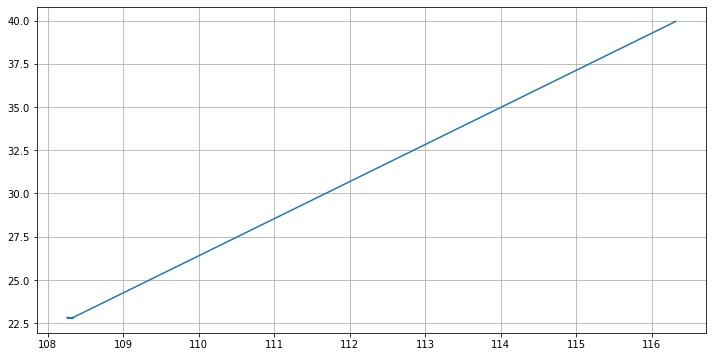

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(df_small.lon, df_small.lat)
plt.grid()

# Cartopy

Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

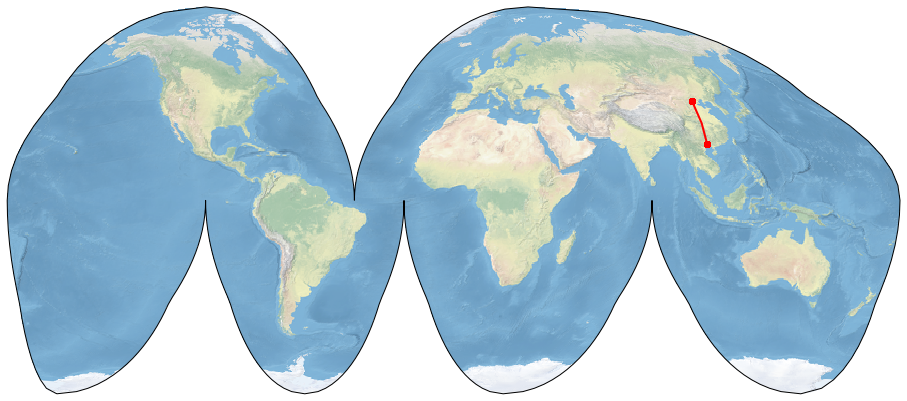

In [8]:
plt.figure(figsize = (16, 9))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.stock_img()

plt.plot(df_small.lon.values.tolist(), df_small.lat.values.tolist(),
         color='red', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),)

plt.show()

# GeoPandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

A GeoDataFrame needs a shapely object. We use geopandas `points_from_xy()` to transform longitude and latitude into a list of shapely `Point` objects and set it as a geometry while creating the GeoDataFrame.

In [9]:
gdf = gpd.GeoDataFrame(df_small, geometry=gpd.points_from_xy(x=df_small.lon, y=df_small.lat))
print(gdf.shape[0])
gdf.head()

5000


,lat,lon,datetime,altitude_meters,tripId,userId,geometry
0,39.947122,116.318730,2009-02-14 03:28:49,149.9616,023_20090214032849,023,POINT (116.31873 39.94712)
1,39.947121,116.318705,2009-02-14 03:28:54,149.6568,023_20090214032849,023,POINT (116.31871 39.94712)
2,39.947100,116.319021,2009-02-14 03:28:59,186.8424,023_20090214032849,023,POINT (116.31902 39.94710)
3,39.947140,116.318876,2009-02-14 03:29:04,177.6984,023_20090214032849,023,POINT (116.31888 39.94714)
4,39.947177,116.318921,2009-02-14 03:29:09,166.4208,023_20090214032849,023,POINT (116.31892 39.94718)


In [10]:
print(gpd.datasets.available)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

['naturalearth_lowres', 'naturalearth_cities', 'nybb']


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


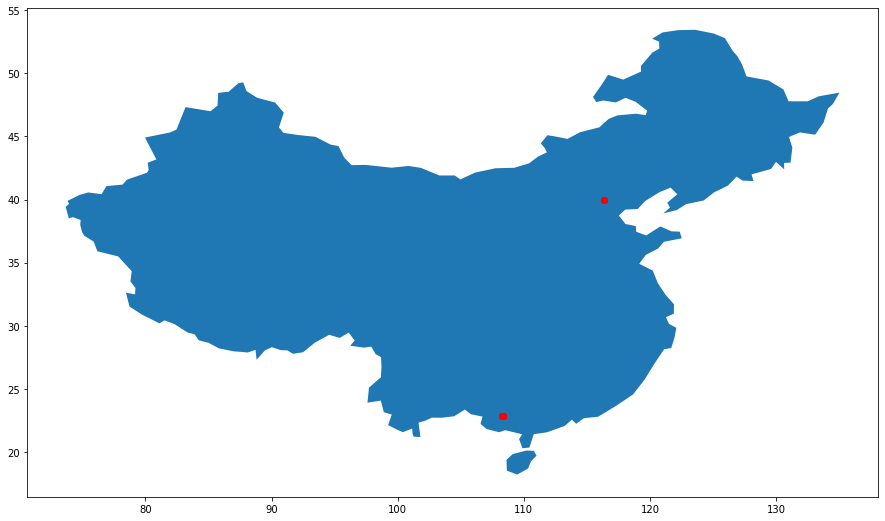

In [11]:
# Get the outline of China
ax = world[world.name == 'China'].plot(figsize=(16, 9))
gdf.plot(color='red', ax=ax);

# Folium

folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in a Leaflet map via folium.

folium enables passing any HTML object as a popup, including `bokeh` plots, but there is a built-in support for vincent and altair visualizations to any marker type, with the visualization as the popover. So a popup could show a graph or rich text field. 

Many examples:
https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/


In [12]:
m = folium.Map(# m = folium.Map([22.813473, 108.333078], zoom_start=15) or use m.fit_bounds(m.get_bounds())
    tiles='OpenStreetMap', # Default
    #tiles='Stamen Toner',
    #tiles='Stamen Terrain',
    #tiles='Mapbox', API_key= os.environ['MAPBOX_API_KEY'],
) 

# Select some trips
trips = df.tripId.unique().tolist()[2:3]

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))
    
    # Plot all the points as simple circles 
    #df_plot.apply(lambda row:folium.CircleMarker(location=[row['lat'], row['lon']]).add_to(m), axis=1)
    
    # Plot a normal static layover 
    # folium.PolyLine(line_data, weight=15).add_to(m)
    
    # Plot as fancy AntPath
    #folium.plugins.AntPath(locations=line_data, reverse='True', dash_array=[20, 30]).add_to(m)
    
    # Clustering of points
    folium.plugins.FastMarkerCluster(df_plot[['lat', 'lon']].values.tolist()).add_to(m)
    

m.fit_bounds(m.get_bounds())
#m.save('data/folium_simple_line.html')
m

In [13]:
m = folium.Map()

# Saving lat e lon and removing NaN
heatmap = [[la,lo] for la,lo in zip(df_small.lat, df_small.lon)]

# plot heatmap
folium.plugins.HeatMap(heatmap, radius=15).add_to(m)
m.fit_bounds(m.get_bounds())
m